In [1]:
%matplotlib notebook

import numpy as np
from astropy import constants
from astropy import units
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, FK5, Angle
from astropy import coordinates
from pyuvdata import utils as uvutils
import matplotlib.pyplot as plt

In [2]:
cofa_lat = -30.72152612068925 * np.pi / 180.0
cofa_lon = 21.42830382686301 * np.pi / 180.0
cofa_alt = 1051.69

cofa_xyz = uvutils.XYZ_from_LatLonAlt(cofa_lat, cofa_lon, cofa_alt)
cofa_enu = uvutils.ENU_from_ECEF(cofa_xyz, cofa_lat, cofa_lon, cofa_alt)

In [3]:
cofa_xyz

array([ 5109325.85521063,  2005235.09142983, -3239928.42475394])

In [4]:
# from a recent-ish data file
antenna_positions = np.array(
    [
        [  11.36289375,  -77.30163178,  -29.87911092],
        [  41.19076854, -136.26376198,  -19.14741053],
        [  38.00914182, -145.30681401,  -30.17954675],
        [   7.33295749,  -31.90930428,   -7.87568616],
        [  39.15360811, -113.57628395,   -8.13735459],
    ]
)

antenna_numbers = np.arange(len(antenna_positions))

In [5]:
antpos_enu = uvutils.ENU_from_ECEF(antenna_positions + cofa_xyz, cofa_lat, cofa_lon, cofa_alt)

In [6]:
antpos_enu

array([[-7.61094735e+01, -3.47096619e+01,  7.94515485e-02],
       [-1.41893090e+02, -2.23038997e+01, -5.16158442e-02],
       [-1.49148680e+02, -3.49885987e+01,  1.98161593e-01],
       [-3.23825865e+01, -9.23869952e+00, -1.30088837e-01],
       [-1.20029624e+02, -9.57342054e+00, -1.81135457e-01]])

In [7]:
Nants = len(antenna_positions)
Nbls = int(Nants * (Nants + 1) / 2)
baselines_enu = np.zeros((Nbls, 3), dtype=np.float64)
ant_1_array = np.zeros((Nbls), dtype=np.int)
ant_2_array = np.zeros((Nbls), dtype=np.int)
idx = 0
for i in range(Nants):
    for j in range(i, Nants):
        ant_1_array[idx] = i
        ant_2_array[idx] = j
        baselines_enu[idx] = antpos_enu[j] - antpos_enu[i]
        idx += 1
        
assert idx == Nbls

In [8]:
cofa_enu

array([0., 0., 0.])

In [9]:
t_int = 16.0  # seconds
t_fs = 0.1  # 100 ms
Ntimes = int(np.round(t_int / t_fs))

# define full Nblt-size arrays
ant_1_array_nblt = np.tile(ant_1_array, Ntimes)
ant_2_array_nblt = np.tile(ant_2_array, Ntimes)

In [10]:
t0 = t_int / 2.0  # "target" time is center of phasing window
times = np.zeros(Ntimes, dtype=np.float64)
for i in range(Ntimes):
    times[i] = t0 - t_int + (i + 0.5) * t_fs

In [11]:
print(times)

[-7.95 -7.85 -7.75 -7.65 -7.55 -7.45 -7.35 -7.25 -7.15 -7.05 -6.95 -6.85
 -6.75 -6.65 -6.55 -6.45 -6.35 -6.25 -6.15 -6.05 -5.95 -5.85 -5.75 -5.65
 -5.55 -5.45 -5.35 -5.25 -5.15 -5.05 -4.95 -4.85 -4.75 -4.65 -4.55 -4.45
 -4.35 -4.25 -4.15 -4.05 -3.95 -3.85 -3.75 -3.65 -3.55 -3.45 -3.35 -3.25
 -3.15 -3.05 -2.95 -2.85 -2.75 -2.65 -2.55 -2.45 -2.35 -2.25 -2.15 -2.05
 -1.95 -1.85 -1.75 -1.65 -1.55 -1.45 -1.35 -1.25 -1.15 -1.05 -0.95 -0.85
 -0.75 -0.65 -0.55 -0.45 -0.35 -0.25 -0.15 -0.05  0.05  0.15  0.25  0.35
  0.45  0.55  0.65  0.75  0.85  0.95  1.05  1.15  1.25  1.35  1.45  1.55
  1.65  1.75  1.85  1.95  2.05  2.15  2.25  2.35  2.45  2.55  2.65  2.75
  2.85  2.95  3.05  3.15  3.25  3.35  3.45  3.55  3.65  3.75  3.85  3.95
  4.05  4.15  4.25  4.35  4.45  4.55  4.65  4.75  4.85  4.95  5.05  5.15
  5.25  5.35  5.45  5.55  5.65  5.75  5.85  5.95  6.05  6.15  6.25  6.35
  6.45  6.55  6.65  6.75  6.85  6.95  7.05  7.15  7.25  7.35  7.45  7.55
  7.65  7.75  7.85  7.95]


In [12]:
omega_e = 7.292e-5  # rad/s

In [13]:
omega_e * times

array([-5.79714e-04, -5.72422e-04, -5.65130e-04, -5.57838e-04,
       -5.50546e-04, -5.43254e-04, -5.35962e-04, -5.28670e-04,
       -5.21378e-04, -5.14086e-04, -5.06794e-04, -4.99502e-04,
       -4.92210e-04, -4.84918e-04, -4.77626e-04, -4.70334e-04,
       -4.63042e-04, -4.55750e-04, -4.48458e-04, -4.41166e-04,
       -4.33874e-04, -4.26582e-04, -4.19290e-04, -4.11998e-04,
       -4.04706e-04, -3.97414e-04, -3.90122e-04, -3.82830e-04,
       -3.75538e-04, -3.68246e-04, -3.60954e-04, -3.53662e-04,
       -3.46370e-04, -3.39078e-04, -3.31786e-04, -3.24494e-04,
       -3.17202e-04, -3.09910e-04, -3.02618e-04, -2.95326e-04,
       -2.88034e-04, -2.80742e-04, -2.73450e-04, -2.66158e-04,
       -2.58866e-04, -2.51574e-04, -2.44282e-04, -2.36990e-04,
       -2.29698e-04, -2.22406e-04, -2.15114e-04, -2.07822e-04,
       -2.00530e-04, -1.93238e-04, -1.85946e-04, -1.78654e-04,
       -1.71362e-04, -1.64070e-04, -1.56778e-04, -1.49486e-04,
       -1.42194e-04, -1.34902e-04, -1.27610e-04, -1.203

## Only correcting for rotation – Coplanar array

In [14]:
# let's assume that omega_e * time == angle to phase to
tau_values = np.zeros((len(antpos_enu), Ntimes))
for i, time in enumerate(times):
    theta = omega_e * time
    # theta ~ \hat{b} \cdot \hat{s}
    # only need to account for \abs{b} now
    bl_lens = np.linalg.norm(antpos_enu, axis=-1)
    c_mks = constants.c.to("m/s").value
    tau_values[:, i] = bl_lens * theta / c_mks  # tau in s

In [15]:
print(np.linalg.norm(antpos_enu, axis=-1))
print("\n\n")
print("tau_values shape: ", tau_values.shape)
print(tau_values)

[ 83.65057621 143.63535627 153.19781363  33.67495208 120.41093739]



tau_values shape:  (5, 160)
[[-1.61756605e-10 -1.59721930e-10 -1.57687256e-10 -1.55652582e-10
  -1.53617908e-10 -1.51583233e-10 -1.49548559e-10 -1.47513885e-10
  -1.45479211e-10 -1.43444536e-10 -1.41409862e-10 -1.39375188e-10
  -1.37340513e-10 -1.35305839e-10 -1.33271165e-10 -1.31236491e-10
  -1.29201816e-10 -1.27167142e-10 -1.25132468e-10 -1.23097794e-10
  -1.21063119e-10 -1.19028445e-10 -1.16993771e-10 -1.14959096e-10
  -1.12924422e-10 -1.10889748e-10 -1.08855074e-10 -1.06820399e-10
  -1.04785725e-10 -1.02751051e-10 -1.00716377e-10 -9.86817023e-11
  -9.66470280e-11 -9.46123537e-11 -9.25776794e-11 -9.05430052e-11
  -8.85083309e-11 -8.64736566e-11 -8.44389824e-11 -8.24043081e-11
  -8.03696338e-11 -7.83349595e-11 -7.63002853e-11 -7.42656110e-11
  -7.22309367e-11 -7.01962624e-11 -6.81615882e-11 -6.61269139e-11
  -6.40922396e-11 -6.20575653e-11 -6.00228911e-11 -5.79882168e-11
  -5.59535425e-11 -5.39188682e-11 -5.1884194

So for ~100 m baselines, we have per-antenna delay corrections that are ~0.2 ns.

## Using group delay form

In [16]:
# now we use:
#  t_g = b_x / c * cos(delta) * sin(H)
#      + b_y / c * ((sin(delta) * cos(L) * cos(H)) - cos(L) * sin(delta)),
# where (H, delta) are the hour-angle/dec of phasing center, and L is latitude
tau_values_tg = np.zeros((len(antpos_enu), Ntimes))
c_mks = constants.c.to("m/s").value
for i, time in enumerate(times):
    ha = -1 * float(time * units.s / units.day) * 2 * np.pi
    for j, antpos in enumerate(antpos_enu):
        t_g = (
            antpos[0] / c_mks * np.cos(cofa_lat) * np.sin(ha)
            + antpos[1] / c_mks * (
                np.sin(cofa_lat) * np.cos(cofa_lat) * np.cos(ha)
            - np.cos(cofa_lat) * np.sin(cofa_lat)
            )
        )
        tau_values_tg[j, i] = t_g

In [17]:
tau_values_tg

array([[-1.26184908e-10, -1.24597571e-10, -1.23010236e-10,
        -1.21422905e-10, -1.19835576e-10, -1.18248250e-10,
        -1.16660926e-10, -1.15073605e-10, -1.13486287e-10,
        -1.11898972e-10, -1.10311659e-10, -1.08724349e-10,
        -1.07137042e-10, -1.05549737e-10, -1.03962435e-10,
        -1.02375136e-10, -1.00787839e-10, -9.92005449e-11,
        -9.76132536e-11, -9.60259650e-11, -9.44386790e-11,
        -9.28513958e-11, -9.12641152e-11, -8.96768374e-11,
        -8.80895622e-11, -8.65022897e-11, -8.49150198e-11,
        -8.33277527e-11, -8.17404882e-11, -8.01532265e-11,
        -7.85659674e-11, -7.69787110e-11, -7.53914572e-11,
        -7.38042062e-11, -7.22169579e-11, -7.06297122e-11,
        -6.90424692e-11, -6.74552289e-11, -6.58679913e-11,
        -6.42807564e-11, -6.26935242e-11, -6.11062946e-11,
        -5.95190678e-11, -5.79318436e-11, -5.63446221e-11,
        -5.47574033e-11, -5.31701872e-11, -5.15829737e-11,
        -4.99957630e-11, -4.84085549e-11, -4.68213496e-1

## Use Proper Baselines – coordinate calculations with astropy

In [18]:
telescope_location = EarthLocation.from_geocentric(*cofa_xyz, unit=units.m)
phase_frame = "icrs"
# pick a fiducial time in the current epoch
jd0 = 2458989
time0 = Time(jd0, format="jd", location=telescope_location)
times_jd = time0 + times * units.s

# set up telescope and phase center
lst_rad = time0.sidereal_time("apparent").to("rad").value
itrs_telescope_locations = telescope_location.get_itrs(obstime=times_jd)
phase_center_coord = SkyCoord(ra=lst_rad, dec=cofa_lat, unit="radian", equinox=time0, frame=FK5)
icrs_coord = phase_center_coord.transform_to("icrs")

frame_telescope_locations = itrs_telescope_locations.transform_to(coordinates.ICRS)
frame_telescope_locations.representation_type = "cartesian"

In [19]:
if True:
    ecef_ant_pos = np.float64(antenna_positions + cofa_xyz)
else:
    fake_enu = antpos_enu
    fake_enu[:, 2] = cofa_alt
    ecef_ant_pos = uvutils.ECEF_from_ENU(fake_enu, cofa_lat, cofa_lon, cofa_alt)
frame_phase_center = icrs_coord
uvw_array = np.zeros((Nbls * Ntimes, 3), dtype=np.float64)

for i in range(len(times)):
    i1 = i * Nbls
    i2 = (i + 1) * Nbls
    inds = np.ix_(np.arange(i1, i2))
    time = times_jd[i]
    frame_telescope_location = frame_telescope_locations[i]
    itrs_ant_coord = SkyCoord(
        x=ecef_ant_pos[:, 0] * units.m,
        y=ecef_ant_pos[:, 1] * units.m,
        z=ecef_ant_pos[:, 2] * units.m,
        frame="itrs",
        obstime=time,
    )
    frame_ant_coord = itrs_ant_coord.transform_to(phase_frame)
    frame_ant_rel = (
        (frame_ant_coord.cartesian - frame_telescope_location.cartesian)
        .get_xyz()
        .T.value
    )
    frame_ant_uvw = uvutils.phase_uvw(
        frame_phase_center.ra.rad, frame_phase_center.dec.rad, frame_ant_rel
    )
    
    ant_sort = np.argsort(antenna_numbers)
    ant1_index = np.searchsorted(
        antenna_numbers[ant_sort], ant_1_array_nblt[inds]
    )
    ant2_index = np.searchsorted(
        antenna_numbers[ant_sort], ant_2_array_nblt[inds]
    )
    uvw_array[inds] = (
        frame_ant_uvw[ant_sort][ant2_index, :]
        - frame_ant_uvw[ant_sort][ant1_index, :]
    )

delays_astropy = uvw_array[:, 2] / constants.c.to("m/s").value

In [20]:
delays_astropy[:Nbls]

array([ 0.00000000e+00, -5.16775814e-10,  3.09436240e-10, -6.50420749e-10,
       -9.24615161e-10,  0.00000000e+00,  8.26212054e-10, -1.33644935e-10,
       -4.07839347e-10,  0.00000000e+00, -9.59856989e-10, -1.23405140e-09,
        0.00000000e+00, -2.74194412e-10,  0.00000000e+00])

In [21]:
tau_values_tg.shape

(5, 160)

In [22]:
delays_tg = np.zeros_like(delays_astropy)
for itime in range(Ntimes):
    idx0 = itime * Nbls
    for ibl in range(Nbls):
        idx = idx0 + ibl
        ant1 = ant_1_array[ibl]
        ant2 = ant_2_array[ibl]
        tau1 = tau_values_tg[ant1, itime]
        tau2 = tau_values_tg[ant2, itime]
        delays_tg[idx] = tau2 - tau1

In [23]:
delays_tg[:Nbls]

array([ 0.00000000e+00, -1.09054879e-10, -1.21086504e-10,  7.24978899e-11,
       -7.28058978e-11,  0.00000000e+00, -1.20316255e-11,  1.81552768e-10,
        3.62489807e-11,  0.00000000e+00,  1.93584394e-10,  4.82806063e-11,
        0.00000000e+00, -1.45303788e-10,  0.00000000e+00])

In [24]:
delays = np.zeros_like(delays_astropy)
for itime in range(Ntimes):
    idx0 = itime * Nbls
    for ibl in range(Nbls):
        idx = idx0 + ibl
        ant1 = ant_1_array[ibl]
        ant2 = ant_2_array[ibl]
        tau1 = tau_values[ant1, itime]
        tau2 = tau_values[ant2, itime]
        delays[idx] = tau2 - tau1

<IPython.core.display.Javascript object>


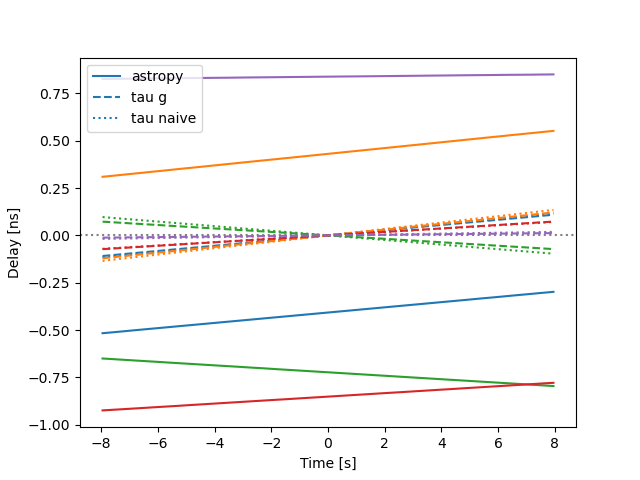

In [25]:
fig = plt.figure()
ax = plt.gca()
ax.axhline(y=0.0, linestyle=":", color="0.5")

bl0_astropy = delays_astropy[1::Nbls]
bl0_tg = delays_tg[1::Nbls]
bl0_n = delays[1::Nbls]
bl1_astropy = delays_astropy[2::Nbls]
bl1_tg = delays_tg[2::Nbls]
bl1_n = delays[2::Nbls]
bl2_astropy = delays_astropy[3::Nbls]
bl2_tg = delays_tg[3::Nbls]
bl2_n = delays[3::Nbls]
bl3_astropy = delays_astropy[4::Nbls]
bl3_tg = delays_tg[4::Nbls]
bl3_n = delays[4::Nbls]
bl4_astropy = delays_astropy[6::Nbls]
bl4_tg = delays_tg[6::Nbls]
bl4_n = delays[6::Nbls]

ax.plot(times, 1e9 * bl0_astropy, color="C0", label="astropy")
ax.plot(times, 1e9 * bl0_tg, color="C0", linestyle="--", label="tau g")
ax.plot(times, 1e9 * bl0_n, color="C0", linestyle=":", label="tau naive")
ax.plot(times, 1e9 * bl1_astropy, color="C1")
ax.plot(times, 1e9 * bl1_tg, color="C1", linestyle="--")
ax.plot(times, 1e9 * bl1_n, color="C1", linestyle=":")
ax.plot(times, 1e9 * bl2_astropy, color="C2")
ax.plot(times, 1e9 * bl2_tg, color="C2", linestyle="--")
ax.plot(times, 1e9 * bl2_n, color="C2", linestyle=":")
ax.plot(times, 1e9 * bl3_astropy, color="C3")
ax.plot(times, 1e9 * bl3_tg, color="C3", linestyle="--")
ax.plot(times, 1e9 * bl3_n, color="C3", linestyle=":")
ax.plot(times, 1e9 * bl4_astropy, color="C4")
ax.plot(times, 1e9 * bl4_tg, color="C4", linestyle="--")
ax.plot(times, 1e9 * bl4_n, color="C4", linestyle=":")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Delay [ns]")
ax.legend(loc=0)
plt.show()

<IPython.core.display.Javascript object>


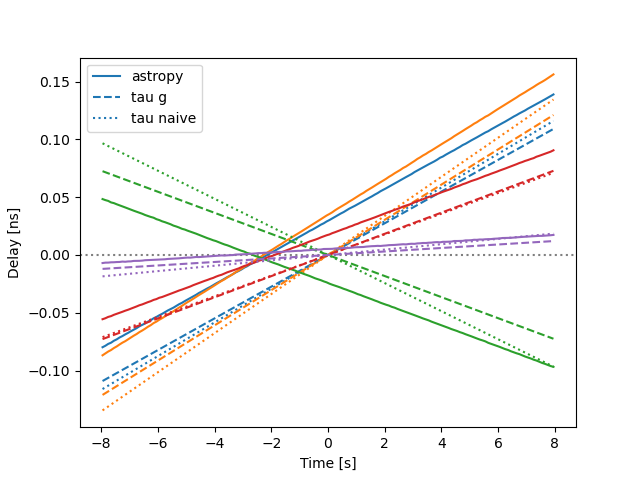

In [28]:
# what about a coplanar array?
fake_enu = antpos_enu
fake_enu[:, 2] = cofa_alt
ecef_ant_pos = uvutils.ECEF_from_ENU(fake_enu, cofa_lat, cofa_lon, cofa_alt)
frame_phase_center = icrs_coord
uvw_array = np.zeros((Nbls * Ntimes, 3), dtype=np.float64)

for i in range(len(times)):
    i1 = i * Nbls
    i2 = (i + 1) * Nbls
    inds = np.ix_(np.arange(i1, i2))
    time = times_jd[i]
    frame_telescope_location = frame_telescope_locations[i]
    itrs_ant_coord = SkyCoord(
        x=ecef_ant_pos[:, 0] * units.m,
        y=ecef_ant_pos[:, 1] * units.m,
        z=ecef_ant_pos[:, 2] * units.m,
        frame="itrs",
        obstime=time,
    )
    frame_ant_coord = itrs_ant_coord.transform_to(phase_frame)
    frame_ant_rel = (
        (frame_ant_coord.cartesian - frame_telescope_location.cartesian)
        .get_xyz()
        .T.value
    )
    frame_ant_uvw = uvutils.phase_uvw(
        frame_phase_center.ra.rad, frame_phase_center.dec.rad, frame_ant_rel
    )
    
    ant_sort = np.argsort(antenna_numbers)
    ant1_index = np.searchsorted(
        antenna_numbers[ant_sort], ant_1_array_nblt[inds]
    )
    ant2_index = np.searchsorted(
        antenna_numbers[ant_sort], ant_2_array_nblt[inds]
    )
    uvw_array[inds] = (
        frame_ant_uvw[ant_sort][ant2_index, :]
        - frame_ant_uvw[ant_sort][ant1_index, :]
    )

delays_astropy = uvw_array[:, 2] / constants.c.to("m/s").value

delays_tg = np.zeros_like(delays_astropy)
for itime in range(Ntimes):
    idx0 = itime * Nbls
    for ibl in range(Nbls):
        idx = idx0 + ibl
        ant1 = ant_1_array[ibl]
        ant2 = ant_2_array[ibl]
        tau1 = tau_values_tg[ant1, itime]
        tau2 = tau_values_tg[ant2, itime]
        delays_tg[idx] = tau2 - tau1
        
delays = np.zeros_like(delays_astropy)
for itime in range(Ntimes):
    idx0 = itime * Nbls
    for ibl in range(Nbls):
        idx = idx0 + ibl
        ant1 = ant_1_array[ibl]
        ant2 = ant_2_array[ibl]
        tau1 = tau_values[ant1, itime]
        tau2 = tau_values[ant2, itime]
        delays[idx] = tau2 - tau1
        
fig = plt.figure()
ax = plt.gca()
ax.axhline(y=0.0, linestyle=":", color="0.5")

bl0_astropy = delays_astropy[1::Nbls]
bl0_tg = delays_tg[1::Nbls]
bl0_n = delays[1::Nbls]
bl1_astropy = delays_astropy[2::Nbls]
bl1_tg = delays_tg[2::Nbls]
bl1_n = delays[2::Nbls]
bl2_astropy = delays_astropy[3::Nbls]
bl2_tg = delays_tg[3::Nbls]
bl2_n = delays[3::Nbls]
bl3_astropy = delays_astropy[4::Nbls]
bl3_tg = delays_tg[4::Nbls]
bl3_n = delays[4::Nbls]
bl4_astropy = delays_astropy[6::Nbls]
bl4_tg = delays_tg[6::Nbls]
bl4_n = delays[6::Nbls]

ax.plot(times, 1e9 * bl0_astropy, color="C0", label="astropy")
ax.plot(times, 1e9 * bl0_tg, color="C0", linestyle="--", label="tau g")
ax.plot(times, 1e9 * bl0_n, color="C0", linestyle=":", label="tau naive")
ax.plot(times, 1e9 * bl1_astropy, color="C1")
ax.plot(times, 1e9 * bl1_tg, color="C1", linestyle="--")
ax.plot(times, 1e9 * bl1_n, color="C1", linestyle=":")
ax.plot(times, 1e9 * bl2_astropy, color="C2")
ax.plot(times, 1e9 * bl2_tg, color="C2", linestyle="--")
ax.plot(times, 1e9 * bl2_n, color="C2", linestyle=":")
ax.plot(times, 1e9 * bl3_astropy, color="C3")
ax.plot(times, 1e9 * bl3_tg, color="C3", linestyle="--")
ax.plot(times, 1e9 * bl3_n, color="C3", linestyle=":")
ax.plot(times, 1e9 * bl4_astropy, color="C4")
ax.plot(times, 1e9 * bl4_tg, color="C4", linestyle="--")
ax.plot(times, 1e9 * bl4_n, color="C4", linestyle=":")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Delay [ns]")
ax.legend(loc=0)
plt.show()

<IPython.core.display.Javascript object>


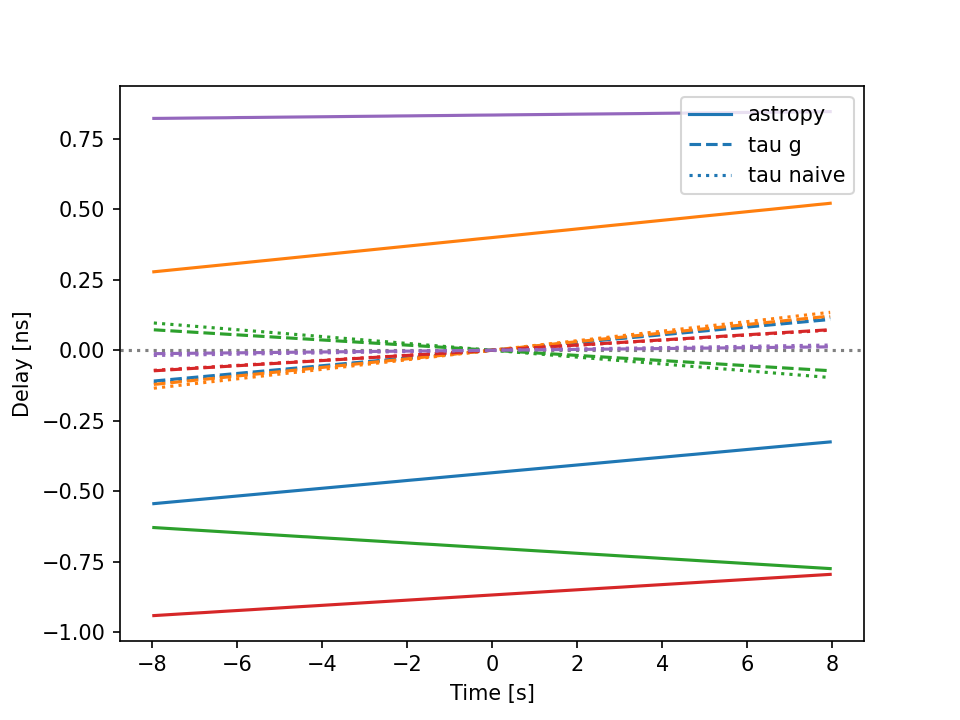

In [30]:
telescope_location = EarthLocation.from_geocentric(*cofa_xyz, unit=units.m)
phase_frame = "icrs"
# pick a fiducial time in the current epoch
jd0 = 2448989
time0 = Time(jd0, format="jd", location=telescope_location)
times_jd = time0 + times * units.s

# set up telescope and phase center
lst_rad = time0.sidereal_time("apparent").to("rad").value
itrs_telescope_locations = telescope_location.get_itrs(obstime=times_jd)
phase_center_coord = SkyCoord(ra=lst_rad, dec=cofa_lat, unit="radian", equinox=time0, frame=FK5)
icrs_coord = phase_center_coord.transform_to("icrs")

frame_telescope_locations = itrs_telescope_locations.transform_to(coordinates.ICRS)
frame_telescope_locations.representation_type = "cartesian"

# what about a coplanar array?
ecef_ant_pos = np.float64(antenna_positions + cofa_xyz)
frame_phase_center = icrs_coord
uvw_array = np.zeros((Nbls * Ntimes, 3), dtype=np.float64)

for i in range(len(times)):
    i1 = i * Nbls
    i2 = (i + 1) * Nbls
    inds = np.ix_(np.arange(i1, i2))
    time = times_jd[i]
    frame_telescope_location = frame_telescope_locations[i]
    itrs_ant_coord = SkyCoord(
        x=ecef_ant_pos[:, 0] * units.m,
        y=ecef_ant_pos[:, 1] * units.m,
        z=ecef_ant_pos[:, 2] * units.m,
        frame="itrs",
        obstime=time,
    )
    frame_ant_coord = itrs_ant_coord.transform_to(phase_frame)
    frame_ant_rel = (
        (frame_ant_coord.cartesian - frame_telescope_location.cartesian)
        .get_xyz()
        .T.value
    )
    frame_ant_uvw = uvutils.phase_uvw(
        frame_phase_center.ra.rad, frame_phase_center.dec.rad, frame_ant_rel
    )
    
    ant_sort = np.argsort(antenna_numbers)
    ant1_index = np.searchsorted(
        antenna_numbers[ant_sort], ant_1_array_nblt[inds]
    )
    ant2_index = np.searchsorted(
        antenna_numbers[ant_sort], ant_2_array_nblt[inds]
    )
    uvw_array[inds] = (
        frame_ant_uvw[ant_sort][ant2_index, :]
        - frame_ant_uvw[ant_sort][ant1_index, :]
    )

delays_astropy = uvw_array[:, 2] / constants.c.to("m/s").value

delays_tg = np.zeros_like(delays_astropy)
for itime in range(Ntimes):
    idx0 = itime * Nbls
    for ibl in range(Nbls):
        idx = idx0 + ibl
        ant1 = ant_1_array[ibl]
        ant2 = ant_2_array[ibl]
        tau1 = tau_values_tg[ant1, itime]
        tau2 = tau_values_tg[ant2, itime]
        delays_tg[idx] = tau2 - tau1
        
delays = np.zeros_like(delays_astropy)
for itime in range(Ntimes):
    idx0 = itime * Nbls
    for ibl in range(Nbls):
        idx = idx0 + ibl
        ant1 = ant_1_array[ibl]
        ant2 = ant_2_array[ibl]
        tau1 = tau_values[ant1, itime]
        tau2 = tau_values[ant2, itime]
        delays[idx] = tau2 - tau1
        
fig = plt.figure()
ax = plt.gca()
ax.axhline(y=0.0, linestyle=":", color="0.5")

bl0_astropy = delays_astropy[1::Nbls]
bl0_tg = delays_tg[1::Nbls]
bl0_n = delays[1::Nbls]
bl1_astropy = delays_astropy[2::Nbls]
bl1_tg = delays_tg[2::Nbls]
bl1_n = delays[2::Nbls]
bl2_astropy = delays_astropy[3::Nbls]
bl2_tg = delays_tg[3::Nbls]
bl2_n = delays[3::Nbls]
bl3_astropy = delays_astropy[4::Nbls]
bl3_tg = delays_tg[4::Nbls]
bl3_n = delays[4::Nbls]
bl4_astropy = delays_astropy[6::Nbls]
bl4_tg = delays_tg[6::Nbls]
bl4_n = delays[6::Nbls]

ax.plot(times, 1e9 * bl0_astropy, color="C0", label="astropy")
ax.plot(times, 1e9 * bl0_tg, color="C0", linestyle="--", label="tau g")
ax.plot(times, 1e9 * bl0_n, color="C0", linestyle=":", label="tau naive")
ax.plot(times, 1e9 * bl1_astropy, color="C1")
ax.plot(times, 1e9 * bl1_tg, color="C1", linestyle="--")
ax.plot(times, 1e9 * bl1_n, color="C1", linestyle=":")
ax.plot(times, 1e9 * bl2_astropy, color="C2")
ax.plot(times, 1e9 * bl2_tg, color="C2", linestyle="--")
ax.plot(times, 1e9 * bl2_n, color="C2", linestyle=":")
ax.plot(times, 1e9 * bl3_astropy, color="C3")
ax.plot(times, 1e9 * bl3_tg, color="C3", linestyle="--")
ax.plot(times, 1e9 * bl3_n, color="C3", linestyle=":")
ax.plot(times, 1e9 * bl4_astropy, color="C4")
ax.plot(times, 1e9 * bl4_tg, color="C4", linestyle="--")
ax.plot(times, 1e9 * bl4_n, color="C4", linestyle=":")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Delay [ns]")
ax.legend(loc=0)
plt.show()

# Astropy, but per-antenna

<IPython.core.display.Javascript object>


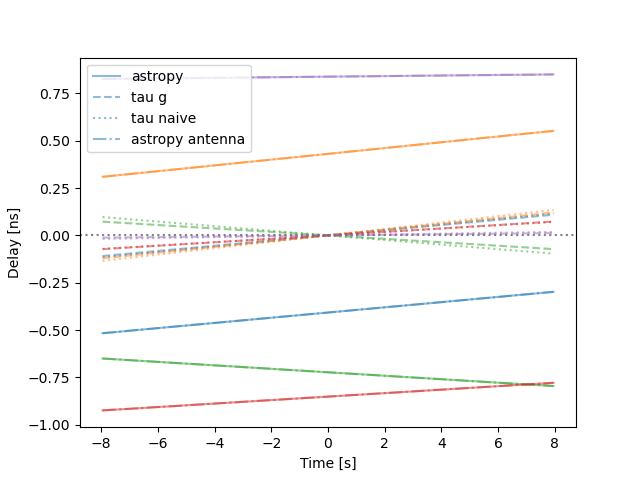

In [36]:
telescope_location = EarthLocation.from_geocentric(*cofa_xyz, unit=units.m)
phase_frame = "icrs"
# pick a fiducial time in the current epoch
jd0 = 2458989
time0 = Time(jd0, format="jd", location=telescope_location)
times_jd = time0 + times * units.s

# set up telescope and phase center
lst_rad = time0.sidereal_time("apparent").to("rad").value
itrs_telescope_locations = telescope_location.get_itrs(obstime=times_jd)
phase_center_coord = SkyCoord(ra=lst_rad, dec=cofa_lat, unit="radian", equinox=time0, frame=FK5)
icrs_coord = phase_center_coord.transform_to("icrs")

frame_telescope_locations = itrs_telescope_locations.transform_to(coordinates.ICRS)
frame_telescope_locations.representation_type = "cartesian"

ecef_ant_pos = np.float64(antenna_positions + cofa_xyz)
frame_phase_center = icrs_coord
uvw_array = np.zeros((Nbls * Ntimes, 3), dtype=np.float64)

tau_astropy = np.zeros((Nants, Ntimes), dtype=np.float64)

for i in range(len(times)):
    i1 = i * Nbls
    i2 = (i + 1) * Nbls
    inds = np.ix_(np.arange(i1, i2))
    time = times_jd[i]
    frame_telescope_location = frame_telescope_locations[i]
    itrs_ant_coord = SkyCoord(
        x=ecef_ant_pos[:, 0] * units.m,
        y=ecef_ant_pos[:, 1] * units.m,
        z=ecef_ant_pos[:, 2] * units.m,
        frame="itrs",
        obstime=time,
    )
    frame_ant_coord = itrs_ant_coord.transform_to(phase_frame)
    frame_ant_rel = (
        (frame_ant_coord.cartesian - frame_telescope_location.cartesian)
        .get_xyz()
        .T.value
    )
    frame_ant_uvw = uvutils.phase_uvw(
        frame_phase_center.ra.rad, frame_phase_center.dec.rad, frame_ant_rel
    )

    ant_sort = np.argsort(antenna_numbers)
    ant1_index = np.searchsorted(
        antenna_numbers[ant_sort], ant_1_array_nblt[inds]
    )
    ant2_index = np.searchsorted(
        antenna_numbers[ant_sort], ant_2_array_nblt[inds]
    )
    uvw_array[inds] = (
        frame_ant_uvw[ant_sort][ant2_index, :]
        - frame_ant_uvw[ant_sort][ant1_index, :]
    )
    
    tau_astropy[:, i] = frame_ant_uvw[:, 2] / constants.c.to("m/s").value

delays_astropy = uvw_array[:, 2] / constants.c.to("m/s").value

delays_tg = np.zeros_like(delays_astropy)
for itime in range(Ntimes):
    idx0 = itime * Nbls
    for ibl in range(Nbls):
        idx = idx0 + ibl
        ant1 = ant_1_array[ibl]
        ant2 = ant_2_array[ibl]
        tau1 = tau_values_tg[ant1, itime]
        tau2 = tau_values_tg[ant2, itime]
        delays_tg[idx] = tau2 - tau1
        
delays = np.zeros_like(delays_astropy)
for itime in range(Ntimes):
    idx0 = itime * Nbls
    for ibl in range(Nbls):
        idx = idx0 + ibl
        ant1 = ant_1_array[ibl]
        ant2 = ant_2_array[ibl]
        tau1 = tau_values[ant1, itime]
        tau2 = tau_values[ant2, itime]
        delays[idx] = tau2 - tau1
        
delays_astropy_ant = np.zeros_like(delays_astropy)
for itime in range(Ntimes):
    idx0 = itime * Nbls
    for ibl in range(Nbls):
        idx = idx0 + ibl
        ant1 = ant_1_array[ibl]
        ant2 = ant_2_array[ibl]
        tau1 = tau_astropy[ant1, itime]
        tau2 = tau_astropy[ant2, itime]
        delays_astropy_ant[idx] = tau2 - tau1

fig = plt.figure()
ax = plt.gca()
ax.axhline(y=0.0, linestyle=":", color="0.5")

bl0_astropy = delays_astropy[1::Nbls]
bl0_tg = delays_tg[1::Nbls]
bl0_n = delays[1::Nbls]
bl0_astropy_ant = delays_astropy_ant[1::Nbls]
bl1_astropy = delays_astropy[2::Nbls]
bl1_tg = delays_tg[2::Nbls]
bl1_n = delays[2::Nbls]
bl1_astropy_ant = delays_astropy_ant[2::Nbls]
bl2_astropy = delays_astropy[3::Nbls]
bl2_tg = delays_tg[3::Nbls]
bl2_n = delays[3::Nbls]
bl2_astropy_ant = delays_astropy_ant[3::Nbls]
bl3_astropy = delays_astropy[4::Nbls]
bl3_tg = delays_tg[4::Nbls]
bl3_n = delays[4::Nbls]
bl3_astropy_ant = delays_astropy_ant[4::Nbls]
bl4_astropy = delays_astropy[6::Nbls]
bl4_tg = delays_tg[6::Nbls]
bl4_n = delays[6::Nbls]
bl4_astropy_ant = delays_astropy_ant[6::Nbls]

ax.plot(times, 1e9 * bl0_astropy, color="C0", label="astropy", alpha=0.5)
ax.plot(times, 1e9 * bl0_tg, color="C0", linestyle="--", label="tau g", alpha=0.5)
ax.plot(times, 1e9 * bl0_n, color="C0", linestyle=":", label="tau naive", alpha=0.5)
ax.plot(times, 1e9 * bl0_astropy_ant, color="C0", linestyle="-.", label="astropy antenna", alpha=0.5)
ax.plot(times, 1e9 * bl1_astropy, color="C1", alpha=0.5)
ax.plot(times, 1e9 * bl1_tg, color="C1", linestyle="--", alpha=0.5)
ax.plot(times, 1e9 * bl1_n, color="C1", linestyle=":", alpha=0.5)
ax.plot(times, 1e9 * bl1_astropy_ant, color="C1", linestyle="-.", alpha=0.5)
ax.plot(times, 1e9 * bl2_astropy, color="C2", alpha=0.5)
ax.plot(times, 1e9 * bl2_tg, color="C2", linestyle="--", alpha=0.5)
ax.plot(times, 1e9 * bl2_n, color="C2", linestyle=":", alpha=0.5)
ax.plot(times, 1e9 * bl2_astropy_ant, color="C2", linestyle="-.", alpha=0.5)
ax.plot(times, 1e9 * bl3_astropy, color="C3", alpha=0.5)
ax.plot(times, 1e9 * bl3_tg, color="C3", linestyle="--", alpha=0.5)
ax.plot(times, 1e9 * bl3_n, color="C3", linestyle=":", alpha=0.5)
ax.plot(times, 1e9 * bl3_astropy_ant, color="C3", linestyle="-.", alpha=0.5)
ax.plot(times, 1e9 * bl4_astropy, color="C4", alpha=0.5)
ax.plot(times, 1e9 * bl4_tg, color="C4", linestyle="--", alpha=0.5)
ax.plot(times, 1e9 * bl4_n, color="C4", linestyle=":", alpha=0.5)
ax.plot(times, 1e9 * bl4_astropy_ant, color="C4", linestyle="-.", alpha=0.5)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Delay [ns]")
ax.legend(loc=0)
plt.show()

# How Long Are Delays Good For?

<IPython.core.display.Javascript object>


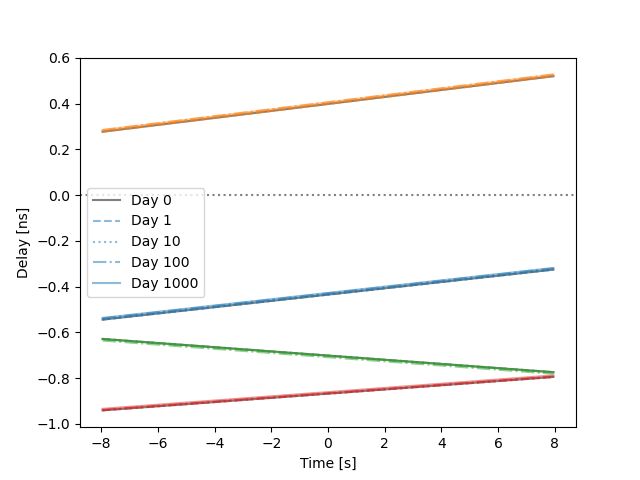

In [41]:
telescope_location = EarthLocation.from_geocentric(*cofa_xyz, unit=units.m)
phase_frame = "icrs"
# pick a few JDs
jd_list = [2449000, 2449001, 2449010, 2449100, 2450000]
delays_list = []
for jd in jd_list:
    time0 = Time(jd, format="jd", location=telescope_location)
    times_jd = time0 + times * units.s

    # set up telescope and phase center
    lst_rad = time0.sidereal_time("apparent").to("rad").value
    itrs_telescope_locations = telescope_location.get_itrs(obstime=times_jd)
    phase_center_coord = SkyCoord(ra=lst_rad, dec=cofa_lat, unit="radian", equinox=time0, frame=FK5)
    icrs_coord = phase_center_coord.transform_to("icrs")

    frame_telescope_locations = itrs_telescope_locations.transform_to(coordinates.ICRS)
    frame_telescope_locations.representation_type = "cartesian"

    ecef_ant_pos = np.float64(antenna_positions + cofa_xyz)
    frame_phase_center = icrs_coord

    tau_vals = np.zeros((Nants, Ntimes), dtype=np.float64)

    for i in range(len(times)):
        time = times_jd[i]
        frame_telescope_location = frame_telescope_locations[i]
        itrs_ant_coord = SkyCoord(
            x=ecef_ant_pos[:, 0] * units.m,
            y=ecef_ant_pos[:, 1] * units.m,
            z=ecef_ant_pos[:, 2] * units.m,
            frame="itrs",
            obstime=time,
        )
        frame_ant_coord = itrs_ant_coord.transform_to(phase_frame)
        frame_ant_rel = (
            (frame_ant_coord.cartesian - frame_telescope_location.cartesian)
            .get_xyz()
            .T.value
        )
        frame_ant_uvw = uvutils.phase_uvw(
            frame_phase_center.ra.rad, frame_phase_center.dec.rad, frame_ant_rel
        )

        tau_vals[:, i] = frame_ant_uvw[:, 2] / constants.c.to("m/s").value
        
    delays = np.zeros((Nbls * Ntimes), dtype=np.float64)
    for itime in range(Ntimes):
        idx0 = itime * Nbls
        for ibl in range(Nbls):
            idx = idx0 + ibl
            ant1 = ant_1_array[ibl]
            ant2 = ant_2_array[ibl]
            tau1 = tau_vals[ant1, itime]
            tau2 = tau_vals[ant2, itime]
            delays[idx] = tau2 - tau1

    delays_list.append(delays)

fig = plt.figure()
ax = plt.gca()
ax.axhline(y=0.0, linestyle=":", color="0.5")

bl0_day0 = delays_list[0][1::Nbls]
bl0_day1 = delays_list[1][1::Nbls]
bl0_day10 = delays_list[2][1::Nbls]
bl0_day100 = delays_list[3][1::Nbls]
bl0_day1000 = delays_list[4][1::Nbls]
bl1_day0 = delays_list[0][2::Nbls]
bl1_day1 = delays_list[1][2::Nbls]
bl1_day10 = delays_list[2][2::Nbls]
bl1_day100 = delays_list[3][2::Nbls]
bl1_day1000 = delays_list[4][2::Nbls]
bl2_day0 = delays_list[0][3::Nbls]
bl2_day1 = delays_list[1][3::Nbls]
bl2_day10 = delays_list[2][3::Nbls]
bl2_day100 = delays_list[3][3::Nbls]
bl2_day1000 = delays_list[4][3::Nbls]
bl3_day0 = delays_list[0][4::Nbls]
bl3_day1 = delays_list[1][4::Nbls]
bl3_day10 = delays_list[2][4::Nbls]
bl3_day100 = delays_list[3][4::Nbls]
bl3_day1000 = delays_list[4][4::Nbls]

ax.plot(times, 1e9 * bl0_day0, color="k", label="Day 0", alpha=0.5)
ax.plot(times, 1e9 * bl0_day1, color="C0", linestyle="--", label="Day 1", alpha=0.5)
ax.plot(times, 1e9 * bl0_day10, color="C0", linestyle=":", label="Day 10", alpha=0.5)
ax.plot(times, 1e9 * bl0_day100, color="C0", linestyle="-.", label="Day 100", alpha=0.5)
ax.plot(times, 1e9 * bl0_day1000, color="C0", linestyle="-", label="Day 1000", alpha=0.5)
ax.plot(times, 1e9 * bl1_day0, color="k", alpha=0.5)
ax.plot(times, 1e9 * bl1_day1, color="C1", linestyle="--", alpha=0.5)
ax.plot(times, 1e9 * bl1_day10, color="C1", linestyle=":", alpha=0.5)
ax.plot(times, 1e9 * bl1_day100, color="C1", linestyle="-.", alpha=0.5)
ax.plot(times, 1e9 * bl1_day1000, color="C1", linestyle="-", alpha=0.5)
ax.plot(times, 1e9 * bl2_day0, color="k", alpha=0.5)
ax.plot(times, 1e9 * bl2_day1, color="C2", linestyle="--", alpha=0.5)
ax.plot(times, 1e9 * bl2_day10, color="C2", linestyle=":", alpha=0.5)
ax.plot(times, 1e9 * bl2_day100, color="C2", linestyle="-.", alpha=0.5)
ax.plot(times, 1e9 * bl2_day1000, color="C2", linestyle="-", alpha=0.5)
ax.plot(times, 1e9 * bl3_day0, color="k", alpha=0.5)
ax.plot(times, 1e9 * bl3_day1, color="C3", linestyle="--", alpha=0.5)
ax.plot(times, 1e9 * bl3_day10, color="C3", linestyle=":", alpha=0.5)
ax.plot(times, 1e9 * bl3_day100, color="C3", linestyle="-.", alpha=0.5)
ax.plot(times, 1e9 * bl3_day1000, color="C3", linestyle="-", alpha=0.5)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Delay [ns]")
ax.legend(loc=0)
plt.show()